In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DisneylandReviews.csv', encoding='latin-1')
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
df = pd.DataFrame()
df['Text'] = data['Review_Text'][0 : 5000]

In [5]:
doc = 'contact me on dave12@gmail.com, krish23@hotmail.com '
address = re.findall(r'[\w\.-]+@[\w\.-]+', doc)
print(address)

['dave12@gmail.com', 'krish23@hotmail.com']


In [6]:
doc2 = 'Contact me on freakyninja@gmail.com'
add2 = re.sub(r'[\w\.-]+@[\w\.-]+',address[1], doc2)
print(add2)

Contact me on krish23@hotmail.com


In [7]:
df['Text'] = df['Text'].apply(lambda x : ' '.join(x.lower() for x in x.split()))
df.head()

,Text
0,if you've ever been to disneyland anywhere you...
1,its been a while since d last time we visit hk...
2,thanks god it wasn t too hot or too humid when...
3,hk disneyland is a great compact park. unfortu...
4,"the location is not in the city, took around 1..."


In [8]:
# we gonna use regrex function to remove puntuations from data
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x : " ".join(lemmatizer.lemmatize(word) for word in x.split()))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


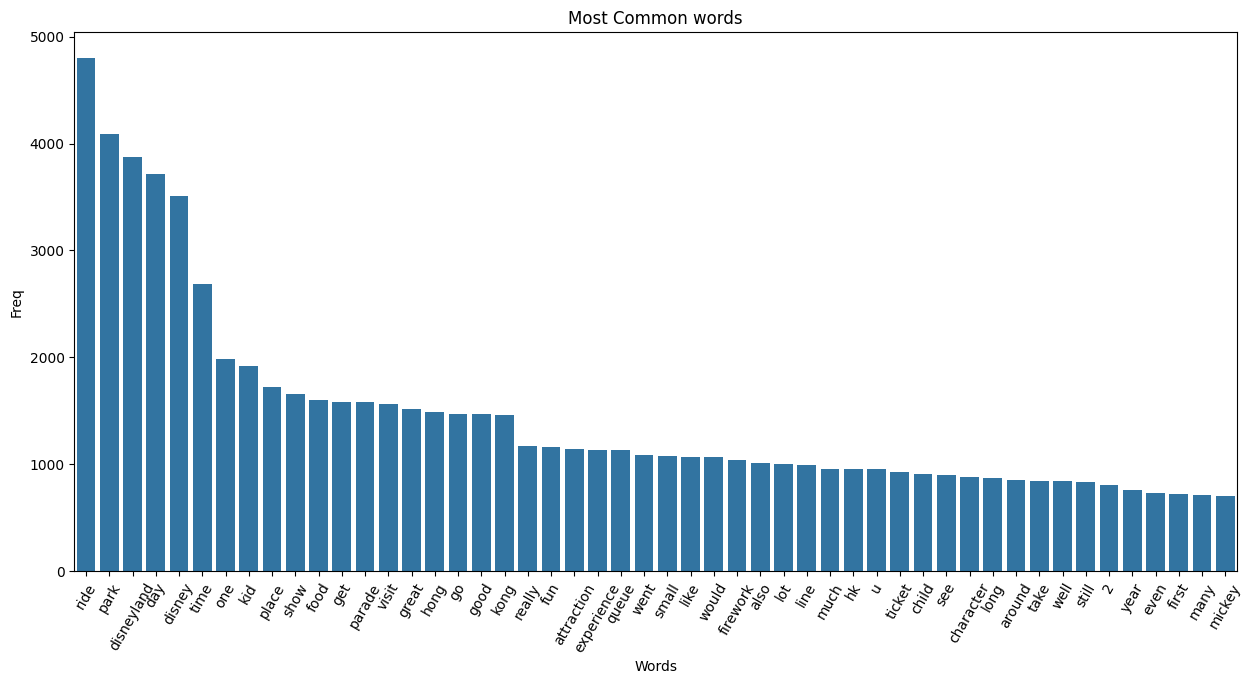

In [11]:
from collections import Counter
most_common = Counter(' '.join(df['Text']).split()).most_common(50)
mco_df = pd.DataFrame(most_common, columns = ['Words', 'Freq'])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,7))
sns.barplot(data = mco_df, x = 'Words', y = 'Freq')
plt.title('Most Common words')
plt.xticks(rotation = 60)
plt.show()

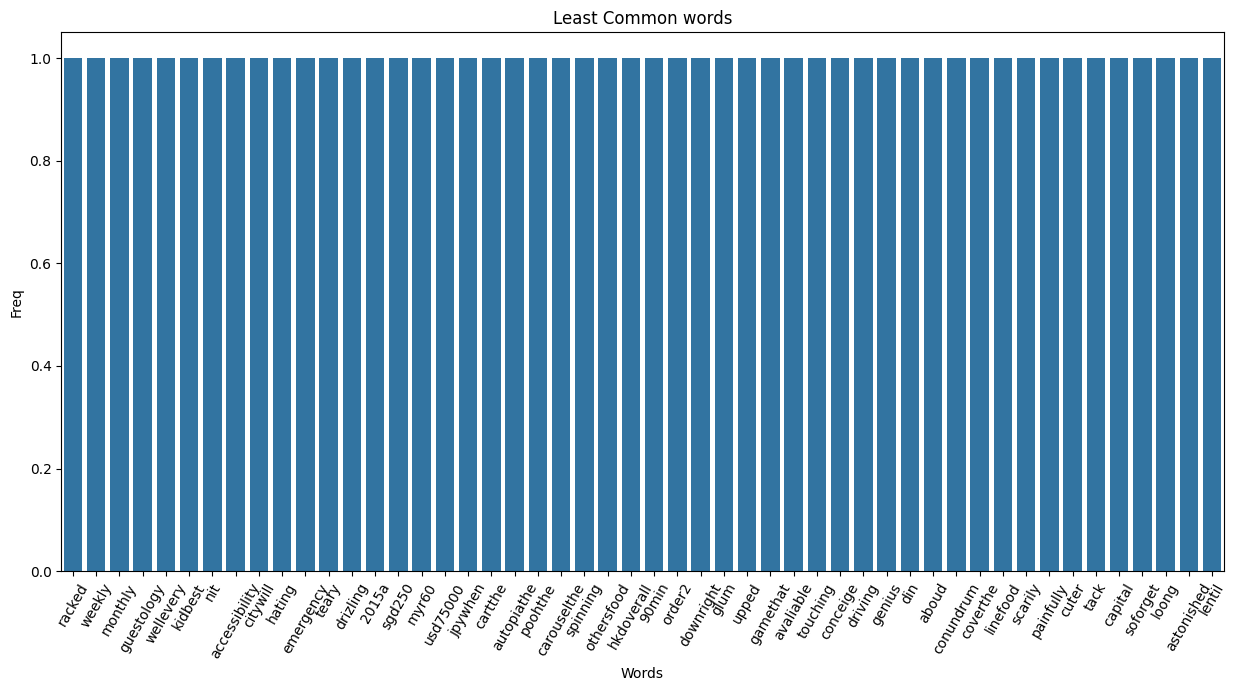

In [12]:
least_common = Counter(' '.join(df['Text']).split()).most_common()[-50 : ]
lco_df = pd.DataFrame(least_common, columns = ['Words', 'Freq'])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,7))
sns.barplot(data = lco_df, x = 'Words', y = 'Freq')
plt.title('Least Common words')
plt.xticks(rotation = 60)
plt.show()

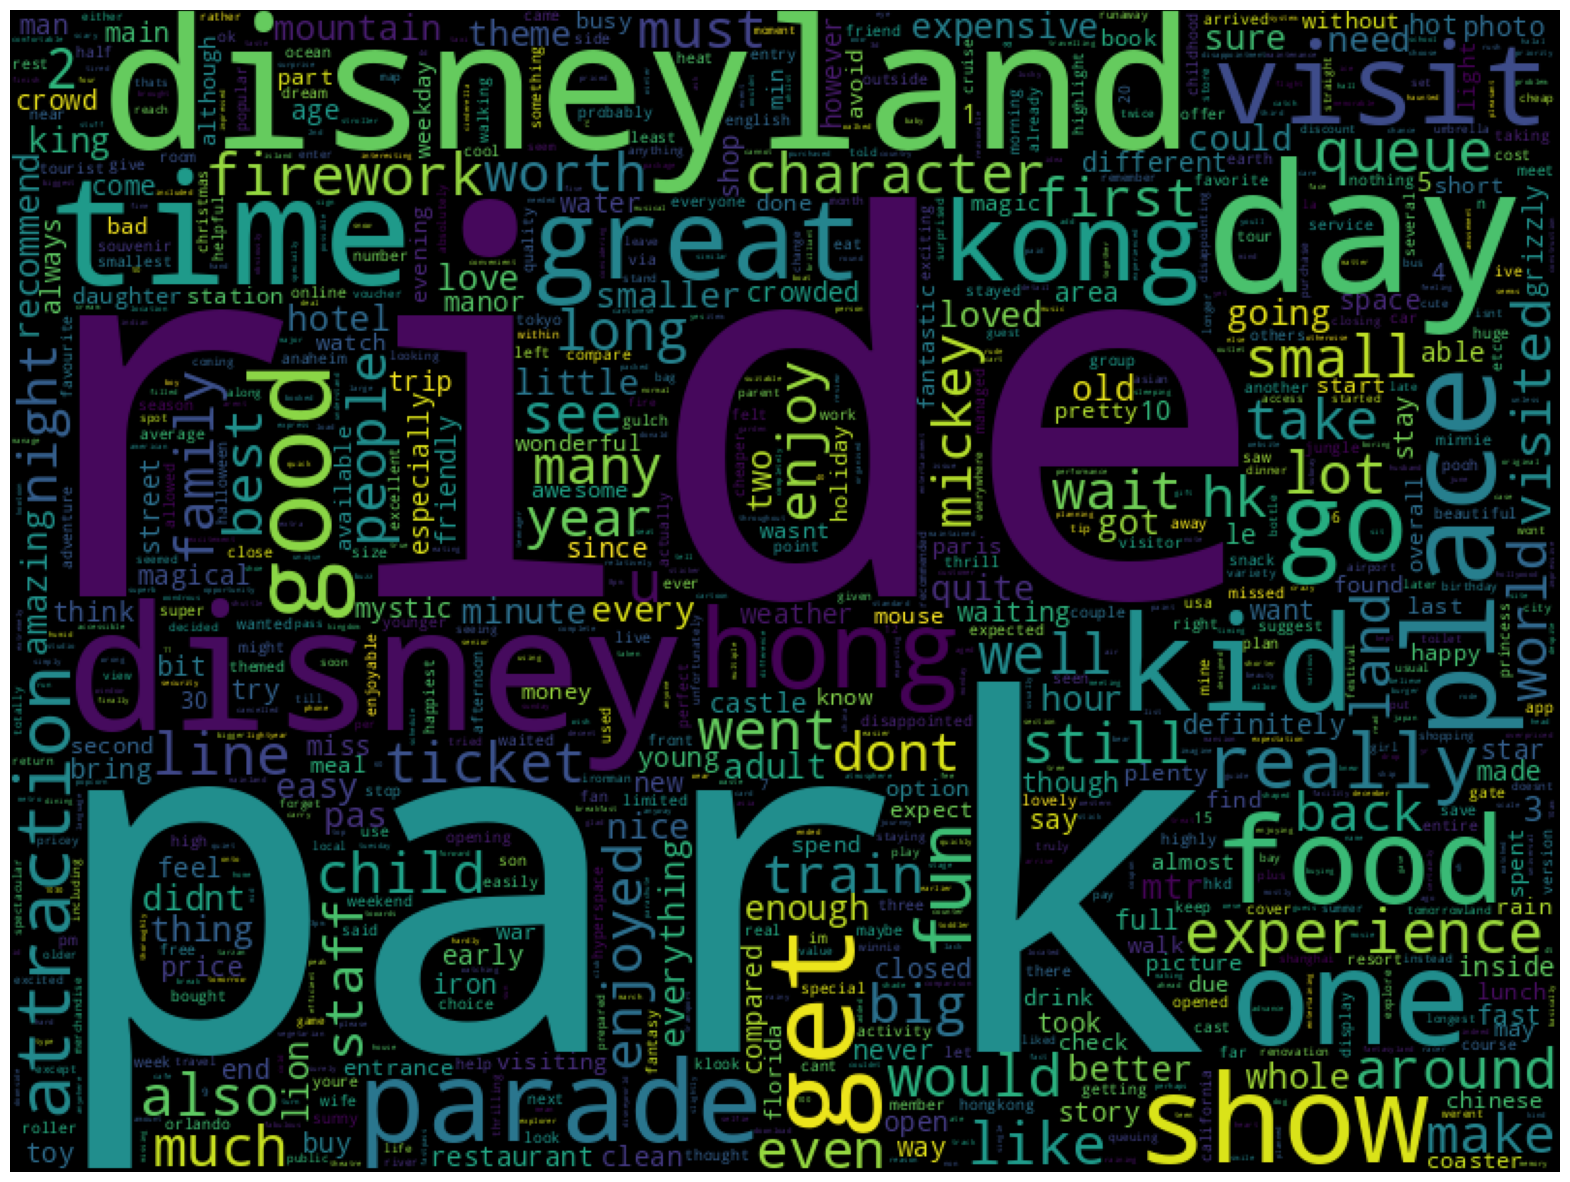

In [13]:
from wordcloud import WordCloud
word_index = Counter(" ".join(df['Text']).split())
w_cloud = WordCloud(max_words = 1500, width = 800, height = 600).generate_from_frequencies(word_index, None)
plt.figure(figsize = (20,18))
plt.imshow(w_cloud)
plt.axis('off')
plt.show()

In [14]:
df1 = df.copy()

In [15]:
# Importing Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# Conveting Text to vectors or you can say in numeric form
vectors = cv.fit_transform(df1['Text'])

In [16]:
# Checking vocabulary
print(cv.vocabulary_)

{'youve': 13964, 'ever': 4559, 'disneyland': 3818, 'anywhere': 1226, 'youll': 13942, 'find': 5102, 'hong': 6296, 'kong': 7135, 'similar': 11224, 'layout': 7270, 'walk': 13447, 'main': 7642, 'street': 11844, 'familiar': 4899, 'feel': 5033, 'one': 8645, 'ride': 10485, 'small': 11322, 'world': 13817, 'absolutely': 714, 'fabulous': 4848, 'worth': 13848, 'day': 3381, 'visited': 13362, 'fairly': 4882, 'hot': 6348, 'relatively': 10233, 'busy': 2167, 'queue': 9909, 'moved': 8206, 'well': 13612, 'since': 11238, 'last': 7235, 'time': 12492, 'visit': 13358, 'hk': 6145, 'yet': 13916, 'stay': 11736, 'tomorrowland': 12645, 'aka': 982, 'marvel': 7774, 'landnow': 7203, 'iron': 6822, 'man': 7684, 'experience': 4761, 'newly': 8390, 'open': 8690, 'ant': 1192, 'waspironman': 13499, 'great': 5766, 'feature': 5018, 'exciting': 4656, 'especially': 4493, 'whole': 13691, 'scenery': 10826, 'central': 2410, 'area': 1308, 'kowloonantman': 7163, 'changed': 2436, 'previous': 9665, 'buzz': 2180, 'lightyear': 7371, '

In [17]:
# Converting Vectors to array
vectors = vectors.toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
from nltk.util import ngrams
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [19]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)

    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

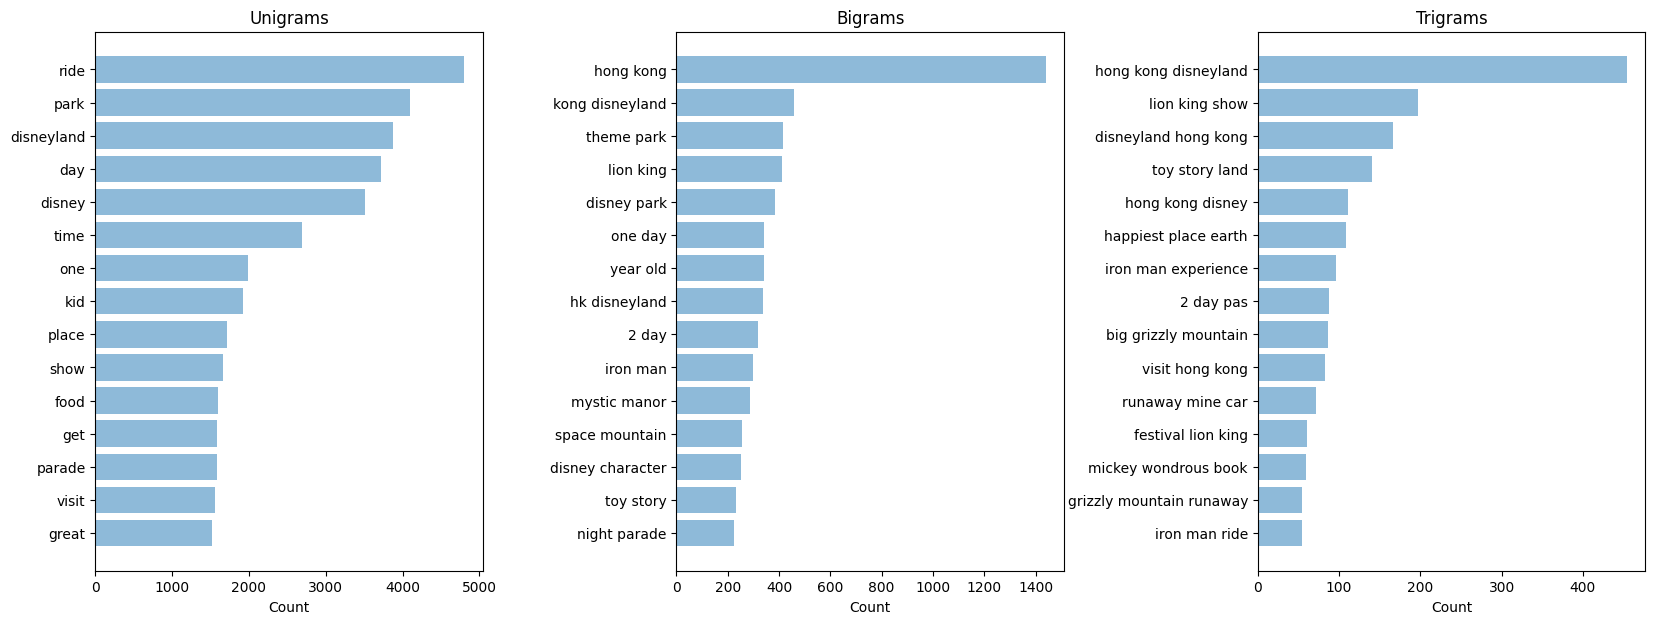

In [20]:
plotNgrams(df1['Text'])

In [21]:
cv2 = CountVectorizer(ngram_range = (2,2))
vectors2 = cv2.fit_transform(df1['Text']).toarray()

In [22]:
cv2.get_feature_names_out()

array(['01 jan', '02012018christmas theme', '03 2018', ...,
       'zootopia meet', 'zootopia ride', 'zurg take'], dtype=object)

In [23]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features = 1000)
vectors3 = hv.fit_transform(df1['Text']).toarray()
print(vectors3.shape)
vectors3

(5000, 1000)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.13483997],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
vectors4 = tv.fit_transform(df1['Text'])
print(tv.idf_)
print(tv.vocabulary_)

[8.82424599 8.82424599 8.82424599 ... 8.41878088 7.90795526 8.82424599]
{'youve': 13964, 'ever': 4559, 'disneyland': 3818, 'anywhere': 1226, 'youll': 13942, 'find': 5102, 'hong': 6296, 'kong': 7135, 'similar': 11224, 'layout': 7270, 'walk': 13447, 'main': 7642, 'street': 11844, 'familiar': 4899, 'feel': 5033, 'one': 8645, 'ride': 10485, 'small': 11322, 'world': 13817, 'absolutely': 714, 'fabulous': 4848, 'worth': 13848, 'day': 3381, 'visited': 13362, 'fairly': 4882, 'hot': 6348, 'relatively': 10233, 'busy': 2167, 'queue': 9909, 'moved': 8206, 'well': 13612, 'since': 11238, 'last': 7235, 'time': 12492, 'visit': 13358, 'hk': 6145, 'yet': 13916, 'stay': 11736, 'tomorrowland': 12645, 'aka': 982, 'marvel': 7774, 'landnow': 7203, 'iron': 6822, 'man': 7684, 'experience': 4761, 'newly': 8390, 'open': 8690, 'ant': 1192, 'waspironman': 13499, 'great': 5766, 'feature': 5018, 'exciting': 4656, 'especially': 4493, 'whole': 13691, 'scenery': 10826, 'central': 2410, 'area': 1308, 'kowloonantman': 716

In [25]:
nltk.download('brown')
nltk.download('punkt')
from textblob import TextBlob
blob = TextBlob('John is Learning Natural Language Processing!')
for np in blob.noun_phrases:
    print(np)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


john
learning
language processing


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
cv4 = CountVectorizer()
vectors4 = cv4.fit_transform(df1['Text']).toarray()
c_sim = cosine_similarity(vectors4)
print(c_sim[0 : 5])

[[1.         0.08858079 0.12896518 ... 0.02702703 0.15517288 0.02632491]
 [0.08858079 1.         0.21134099 ... 0.05905386 0.12108987 0.23007892]
 [0.12896518 0.21134099 1.         ... 0.11284453 0.09255503 0.20412415]
 [0.0949158  0.15554275 0.22645541 ... 0.07118685 0.17516226 0.06933752]
 [0.19936306 0.10890171 0.16647802 ... 0.         0.13081399 0.        ]]


In [27]:
nltk.download('averaged_perceptron_tagger')
tokens = df1['Text'][0]
tokens = tokens.split()
tags = nltk.pos_tag(tokens)
print(tags)

[('youve', 'RB'), ('ever', 'RB'), ('disneyland', 'VB'), ('anywhere', 'RB'), ('youll', 'JJ'), ('find', 'NN'), ('disneyland', 'NN'), ('hong', 'NN'), ('kong', 'NN'), ('similar', 'JJ'), ('layout', 'NN'), ('walk', 'NN'), ('main', 'JJ'), ('street', 'NN'), ('familiar', 'JJ'), ('feel', 'VB'), ('one', 'CD'), ('ride', 'NN'), ('small', 'JJ'), ('world', 'NN'), ('absolutely', 'RB'), ('fabulous', 'JJ'), ('worth', 'JJ'), ('day', 'NN'), ('visited', 'VBD'), ('fairly', 'RB'), ('hot', 'JJ'), ('relatively', 'RB'), ('busy', 'JJ'), ('queue', 'NNS'), ('moved', 'VBD'), ('fairly', 'RB'), ('well', 'RB')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [28]:
pip install svgling

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


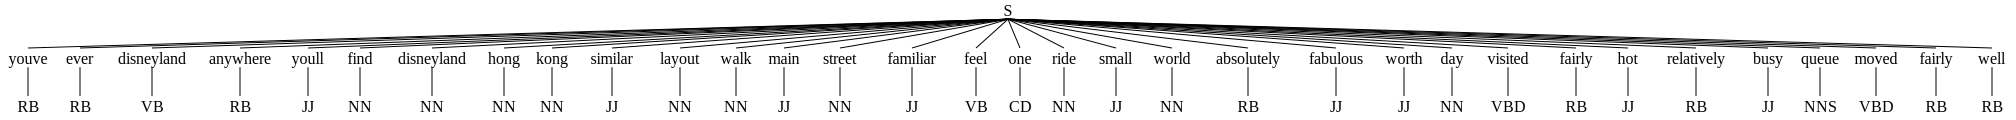

In [29]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.ne_chunk(tags , binary = False)

In [30]:
import gensim
from gensim import corpora
Lda = gensim.models.ldamodel.LdaModel
tokens = df1['Text'][0 : 10]
tokens = tokens.apply(lambda x: x.split())
print(tokens)
dic = corpora.Dictionary(tokens)
doc_term_mat = [dic.doc2bow(doc) for doc in tokens]
print(doc_term_mat)

0    [youve, ever, disneyland, anywhere, youll, fin...
1    [since, last, time, visit, hk, disneyland, yet...
2    [thanks, god, hot, humid, visiting, park, othe...
3    [hk, disneyland, great, compact, park, unfortu...
4    [location, city, took, around, 1, hour, kowlon...
5    [disney, world, disneyland, anaheim, tokyo, di...
6    [great, place, day, go, wont, even, know, obvi...
7    [think, intro, disney, magic, little, one, alm...
8    [feel, let, placethe, disneyland, train, fanta...
9    [go, talking, disneyland, whatever, say, le, d...
Name: Text, dtype: object
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(4, 1), (9, 2), (15, 1), (23, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), 

In [31]:
lda_model = Lda(doc_term_mat, num_topics = 3, id2word = dic, passes = 200)
lda_model.print_topics()

[(0,
  '0.016*"place" + 0.011*"disney" + 0.011*"fun" + 0.011*"know" + 0.011*"disneyland" + 0.006*"feel" + 0.006*"staff" + 0.006*"let" + 0.006*"train" + 0.006*"seems"'),
 (1,
  '0.023*"disneyland" + 0.014*"disney" + 0.014*"n" + 0.012*"food" + 0.012*"show" + 0.010*"ticket" + 0.010*"hk" + 0.010*"park" + 0.010*"attraction" + 0.008*"day"'),
 (2,
  '0.015*"main" + 0.011*"really" + 0.011*"park" + 0.011*"street" + 0.011*"attraction" + 0.008*"even" + 0.008*"quite" + 0.008*"closed" + 0.008*"hot" + 0.008*"day"')]

In [32]:
pip install pywsd

In [33]:
from nltk.corpus import wordnet as wn
from itertools import chain
from pywsd.lesk import simple_lesk

Warming up PyWSD (takes ~10 secs)... took 10.111563682556152 secs.


In [34]:
bank_sents = ['I went to bank to deposit my money', 'The river bank was full of plastic garbage']
sen1 = simple_lesk(bank_sents[0], 'bank')
print(f'Sense of 1st line : {sen1}')
print(f'Definition : {sen1.definition()}')
sen2 = simple_lesk(bank_sents[1], 'bank')
print('\n')
print(f'Sense of 2nd line : {sen2}')
print(f'Definition : {sen2.definition()}')

Sense of 1st line : Synset('depository_financial_institution.n.01')
Definition : a financial institution that accepts deposits and channels the money into lending activities


Sense of 2nd line : Synset('bank.n.01')
Definition : sloping land (especially the slope beside a body of water)


In [35]:
sen_df = data[['Rating', 'Review_Text']]
sen_df.head()

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."


In [37]:
rating_1 = sen_df[sen_df['Rating'] == 1]
rating_2 = sen_df[sen_df['Rating'] == 2].sample(1499)
rating_3 = sen_df[sen_df['Rating'] == 3].sample(1499)
rating_4 = sen_df[sen_df['Rating'] == 4].sample(1499)
rating_5 = sen_df[sen_df['Rating'] == 5].sample(1499)

In [38]:
final_df = pd.concat([rating_1, rating_2, rating_3, rating_4, rating_5], axis = 0) # Concatenating all the ratings along rows so to have equal no. of rating.

In [39]:
final_df = final_df.sample(frac = 1.0) # Shuffleing all the Data

In [40]:
final_df = final_df.reset_index(drop = True)
final_df.head()

,Rating,Review_Text
0,3,We were really excited at the prospect of taki...
1,4,Disneyland needs to get Magic Bands !!!! Magi...
2,2,"I came here with my girlfriend, she has been h..."
3,5,Having been to other adventure park it was goo...
4,5,Upon arriving at Disneyland it was just Magica...


In [43]:
neg_rev = final_df[final_df['Rating'].isin([1,2])]
pos_rev = final_df[final_df['Rating'].isin([4,5])]

In [46]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [47]:
import re
import os
import sys
import ast
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [48]:
analyzer = SentimentIntensityAnalyzer()

In [49]:
## Generating Sentiments
empty_line = []
for row in final_df['Review_Text']:
    vs = analyzer.polarity_scores(row)
    empty_line.append(vs)
# Creating new df woth sentiments
sentiments = pd.DataFrame(empty_line)
sentiments.head()

,neg,neu,pos,compound
0,0.087,0.749,0.164,0.9061
1,0.144,0.805,0.050,-0.7150
2,0.030,0.757,0.213,0.9987
3,0.020,0.797,0.183,0.9107
4,0.024,0.825,0.151,0.9636


In [50]:
final_df = pd.concat([final_df, sentiments], axis = 1)
final_df.head()

,Rating,Review_Text,neg,neu,pos,compound
0,3,We were really excited at the prospect of taki...,0.087,0.749,0.164,0.9061
1,4,Disneyland needs to get Magic Bands !!!! Magi...,0.144,0.805,0.050,-0.7150
2,2,"I came here with my girlfriend, she has been h...",0.030,0.757,0.213,0.9987
3,5,Having been to other adventure park it was goo...,0.020,0.797,0.183,0.9107
4,5,Upon arriving at Disneyland it was just Magica...,0.024,0.825,0.151,0.9636


In [51]:
import numpy
final_df['sentiment'] = numpy.sign(final_df['compound'])
final_df['sentiment'] = final_df['sentiment'].replace({
    1 : 'Positive', 0 : 'Neutral', -1 : 'Negative'
})
final_df.sample(10)

,Rating,Review_Text,neg,neu,pos,compound,sentiment
3115,4,"As with other theme parks, be prepared to queu...",0.000,0.888,0.112,0.4215,Positive
3395,5,Do I have to say something about this manmade ...,0.000,0.881,0.119,0.6478,Positive
2681,4,We had a family three day break in Disneyland ...,0.069,0.818,0.113,0.7738,Positive
2449,1,"We are an Indian family, I had visited with my...",0.142,0.815,0.044,-0.9659,Negative
1176,5,Yes Queues.Not as Expensive as people make out...,0.051,0.889,0.060,0.2256,Positive
3441,5,This is the ultimate theme park. People will c...,0.028,0.766,0.207,0.9923,Positive
1316,2,Worst day of out USA vacation and we expected ...,0.102,0.881,0.017,-0.8834,Negative
599,5,Just come back from a weekend at Disneyland Pa...,0.045,0.909,0.046,0.0396,Positive
7404,4,Hong Kong Disneyland is a happy place that peo...,0.056,0.785,0.158,0.9422,Positive
924,5,Last week was my first visit back to the park ...,0.035,0.774,0.191,0.9642,Positive


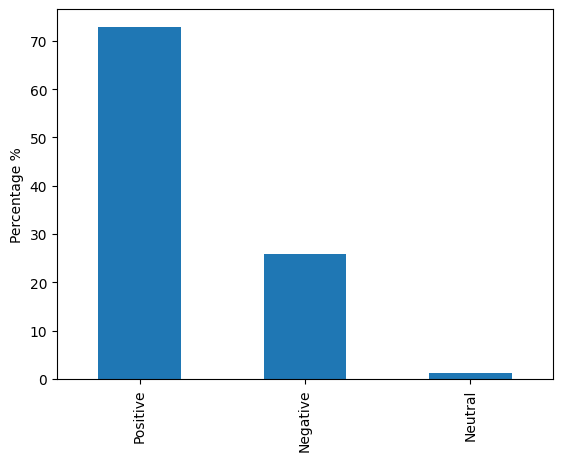

In [52]:
counts = final_df['sentiment'].value_counts()
percentages = counts/counts.sum()*100
percentages.plot.bar()
plt.ylabel('Percentage %')
plt.show()